#  Data Science for Business
  CIAPPONI ALESSANDRO 733433

In [1]:
import pandas as pd
import pylab as plt 
import seaborn as sns
import numpy as np
import math
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Milano: Analisys Hirings and Dismissals

Analysis of hires and layoffs between 2018 and 2021. Data are contained in two different DataSet to combine together with "merge" function.

In [2]:
Hirings_Milano = pd.read_csv('Hiring_Computer_Science_Cleaning.csv')
Dismissals_Milano = pd.read_csv('Dismissal_Computer_Science_Cleaning.csv')

In [3]:
# Change Type of DATA and SETTOREECONOMICO columns
Hirings_Milano = Hirings_Milano.loc[(Hirings_Milano['PROVINCIAIMPRESA'] == 'MILANO')]
Hirings_Milano['DATA'] = pd.to_datetime(Hirings_Milano['DATA'])

Dismissals_Milano = Dismissals_Milano.loc[(Dismissals_Milano['PROVINCIAIMPRESA'] == 'MILANO')]
Dismissals_Milano['DATA'] = pd.to_datetime(Dismissals_Milano['DATA'])

In [4]:
# Time Interval is selected for Hirings
interval_year = (Hirings_Milano['ANNO'] > 2017) & (Hirings_Milano['ANNO'] <= 2021)
Hirings_Milano = Hirings_Milano.loc[interval_year]

In [5]:
# Time Interval is selected for Dismissals
interval_year = (Dismissals_Milano['ANNO'] > 2017) & (Dismissals_Milano['ANNO'] <= 2021)
Dismissals_Milano = Dismissals_Milano.loc[interval_year]

## Comparison of Different Contract Type for 2021

In [6]:
# Groupby on Hiring Job Contracts in Milano > 100 
Contract_Milano_Activated = Hirings_Milano.loc[(Hirings_Milano['ANNO'] == 2021)]
Contract_Milano_Activated = Contract_Milano_Activated.groupby('CONTRATTO').CONTRATTO.count()
Contract_Milano_Activated = Contract_Milano_Activated[Contract_Milano_Activated.values > 100]
Contract_Milano_Activated

CONTRATTO
APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO DI MESTIERE     797
LAVORO A TEMPO DETERMINATO                                    616
LAVORO A TEMPO INDETERMINATO                                 2542
TIROCINIO                                                    1124
Name: CONTRATTO, dtype: int64

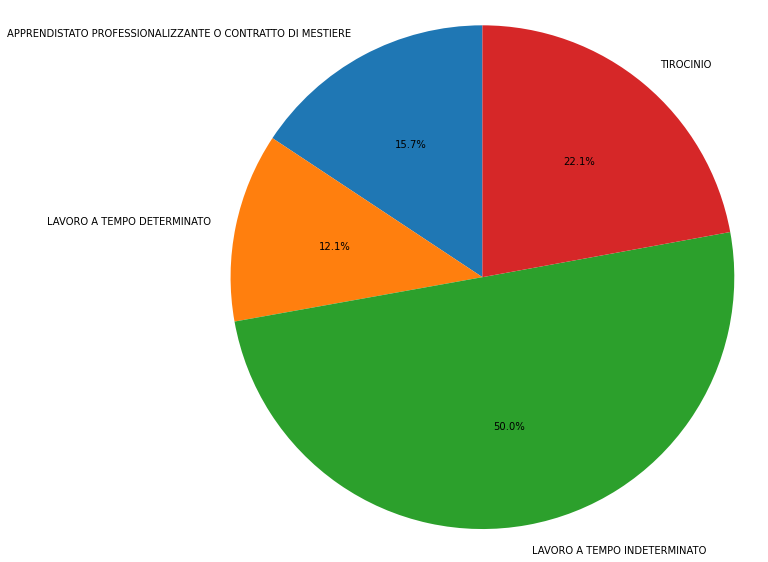

In [7]:
# Piechart creation to understand the variation of job contracts in IT Consulting Sector
xaxis = Contract_Milano_Activated.index
value = Contract_Milano_Activated.values
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(value, labels=xaxis, autopct='%1.1f%%',  #'autopct' represent the field centre of labels
        shadow=False, startangle=90)
ax1.axis('equal')                                # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [8]:
# Groupby on Dismissal Job Contracts in Milano > 100  
Contract_Milano_Ceased = Dismissals_Milano.loc[(Dismissals_Milano['ANNO'] == 2021)]
Contract_Milano_Ceased = Contract_Milano_Ceased.groupby('CONTRATTO').CONTRATTO.count()
Contract_Milano_Ceased = Contract_Milano_Ceased[Contract_Milano_Ceased.values > 100]
Contract_Milano_Ceased

CONTRATTO
APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO DI MESTIERE     336
LAVORO A TEMPO DETERMINATO                                    133
LAVORO A TEMPO INDETERMINATO                                 2255
TIROCINIO                                                     270
Name: CONTRATTO, dtype: int64

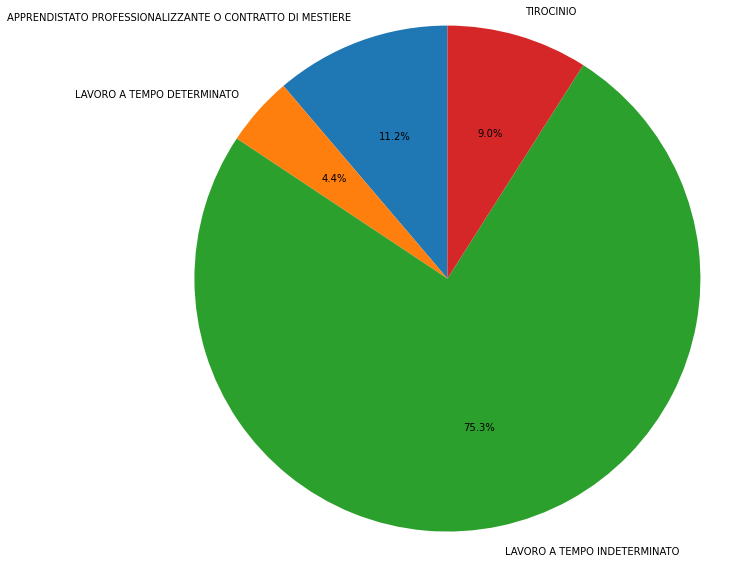

In [9]:
# Piechart creation to understand the variation of job contracts in IT Consulting Sector
xaxis = Contract_Milano_Ceased.index
value = Contract_Milano_Ceased.values
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(value, labels=xaxis, autopct='%1.1f%%',  #'autopct' represent the field centre of labels
        shadow=False, startangle=90)
ax1.axis('equal')                                # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Comparison of Hirings from Two Similar Sectors

In [10]:
Hirings_Milano.head()

,DATA,GENERE,ETA,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO,TIPO,ANNO,SETTOREECONOMICO
1,2020-10-08,M,37,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO A TEMPO INDETERMINATO,TEMPO PIENO,MILANO,ITALIA,ATTIVATO,2020,Altre attività dei servizi connessi alle tecno...
2,2018-09-12,M,29,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,MILANO,ITALIA,ATTIVATO,2018,Altre attività dei servizi connessi alle tecno...
3,2021-10-05,M,38,LAUREA - Vecchio o nuovo ordinamento,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,MILANO,ITALIA,ATTIVATO,2021,Altre attività dei servizi connessi alle tecno...
4,2019-09-04,M,44,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO A TEMPO INDETERMINATO,TEMPO PIENO,MILANO,ITALIA,ATTIVATO,2019,Altre attività dei servizi connessi alle tecno...
5,2019-06-03,M,44,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO A TEMPO INDETERMINATO,TEMPO PIENO,MILANO,ITALIA,ATTIVATO,2019,Altre attività dei servizi connessi alle tecno...


In [11]:
Hirings_Milano_Cons = Hirings_Milano.copy()
Hirings_Milano_Cons = Hirings_Milano_Cons.loc[(Hirings_Milano_Cons['SETTOREECONOMICO'] == "Consulenza nel settore delle tecnologie dell'informatica")]
Hirings_Milano_Altro = Hirings_Milano.copy()
Hirings_Milano_Altro = Hirings_Milano_Altro.loc[(Hirings_Milano_Altro['SETTOREECONOMICO'] == "Altre attività dei servizi connessi alle tecnologie dell'informatica nca")]

In [12]:
# Reconstruction of the DataSets
Hirings_Milano_Cons = Hirings_Milano_Cons[['DATA', 'SETTOREECONOMICO', 'PROVINCIAIMPRESA', 'TIPO', 'ANNO']]
Hirings_Milano_Altro = Hirings_Milano_Altro[['DATA', 'SETTOREECONOMICO', 'PROVINCIAIMPRESA', 'TIPO', 'ANNO']]

In [13]:
Hirings_Milano_Cons = Hirings_Milano_Cons.groupby(["ANNO","SETTOREECONOMICO"]).count()
Hirings_Milano_Cons["ATTIVATO"]= Hirings_Milano_Cons["TIPO"]
Hirings_Milano_Cons = Hirings_Milano_Cons.drop(["DATA","PROVINCIAIMPRESA","TIPO"], axis = 1)
Hirings_Milano_Cons

,,ATTIVATO
ANNO,SETTOREECONOMICO,
2018,Consulenza nel settore delle tecnologie dell'informatica,3570
2019,Consulenza nel settore delle tecnologie dell'informatica,4127
2020,Consulenza nel settore delle tecnologie dell'informatica,2705
2021,Consulenza nel settore delle tecnologie dell'informatica,3506


In [14]:
Hirings_Milano_Altro = Hirings_Milano_Altro.groupby(["ANNO","SETTOREECONOMICO"]).count()
Hirings_Milano_Altro["ATTIVATO"]= Hirings_Milano_Altro["TIPO"]
Hirings_Milano_Altro = Hirings_Milano_Altro.drop(["DATA","PROVINCIAIMPRESA","TIPO"], axis = 1)
Hirings_Milano_Altro

,,ATTIVATO
ANNO,SETTOREECONOMICO,
2018,Altre attività dei servizi connessi alle tecnologie dell'informatica nca,3415
2019,Altre attività dei servizi connessi alle tecnologie dell'informatica nca,3071
2020,Altre attività dei servizi connessi alle tecnologie dell'informatica nca,1825
2021,Altre attività dei servizi connessi alle tecnologie dell'informatica nca,1679


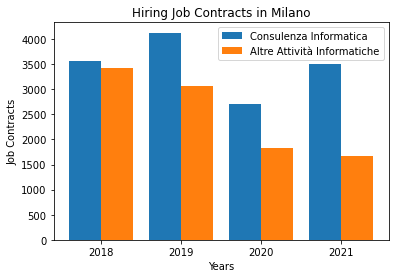

In [15]:
# Hist Plot to compare the Hiring Job Contracts relating to IT Consultancy and Other IT Activities

Advice = Hirings_Milano_Cons.ATTIVATO.to_numpy().ravel()
Other =  Hirings_Milano_Altro.ATTIVATO.to_numpy().ravel()

X = [2018, 2019, 2020, 2021]
Y = Advice
Z = Other

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Y, 0.4, label = 'Consulenza Informatica')
plt.bar(X_axis + 0.2, Z, 0.4, label = 'Altre Attività Informatiche')
  
plt.xticks(X_axis, X)
plt.xlabel("Years")
plt.ylabel("Job Contracts")
plt.title("Hiring Job Contracts in Milano")
plt.legend()
plt.show()

## Comparison of Dismissals from Two Similar Sectors

In [16]:
Dismissals_Milano.head()

,DATA,GENERE,ETA,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO,TIPO,ANNO,SETTOREECONOMICO
3,2019-01-10,M,48,LAUREA - Vecchio o nuovo ordinamento,LAVORO A TEMPO INDETERMINATO,TEMPO PIENO,MILANO,ITALIA,CESSATO,2019,Altre attività dei servizi connessi alle tecno...
4,2019-04-09,F,28,LAUREA - Vecchio o nuovo ordinamento,LAVORO A TEMPO INDETERMINATO,TEMPO PIENO,MILANO,ITALIA,CESSATO,2019,Altre attività dei servizi connessi alle tecno...
5,2021-09-08,M,27,LAUREA - Vecchio o nuovo ordinamento,LAVORO A TEMPO INDETERMINATO,TEMPO PIENO,MILANO,ITALIA,CESSATO,2021,Altre attività dei servizi connessi alle tecno...
6,2021-09-08,F,26,LAUREA - Vecchio o nuovo ordinamento,LAVORO A TEMPO INDETERMINATO,TEMPO PIENO,MILANO,ITALIA,CESSATO,2021,Altre attività dei servizi connessi alle tecno...
9,2021-09-08,M,37,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO A TEMPO INDETERMINATO,TEMPO PIENO,MILANO,ITALIA,CESSATO,2021,Altre attività dei servizi connessi alle tecno...


In [17]:
Dismissals_Milano_Cons = Dismissals_Milano.copy()
Dismissals_Milano_Cons = Dismissals_Milano_Cons.loc[(Dismissals_Milano_Cons['SETTOREECONOMICO'] == "Consulenza nel settore delle tecnologie dell'informatica")]
Dismissals_Milano_Altro = Dismissals_Milano.copy()
Dismissals_Milano_Altro = Dismissals_Milano_Altro.loc[(Dismissals_Milano_Altro['SETTOREECONOMICO'] == "Altre attività dei servizi connessi alle tecnologie dell'informatica nca")]

In [18]:
# Reconstruction of the DataSets
Dismissals_Milano_Cons = Dismissals_Milano_Cons[['DATA', 'SETTOREECONOMICO', 'PROVINCIAIMPRESA', 'TIPO', 'ANNO']]
Dismissals_Milano_Altro = Dismissals_Milano_Altro[['DATA', 'SETTOREECONOMICO', 'PROVINCIAIMPRESA', 'TIPO', 'ANNO']]

In [19]:
Dismissals_Milano_Cons = Dismissals_Milano_Cons.groupby(["ANNO","SETTOREECONOMICO"]).count()
Dismissals_Milano_Cons["CESSATO"]= Dismissals_Milano_Cons["TIPO"]
Dismissals_Milano_Cons = Dismissals_Milano_Cons.drop(["DATA","PROVINCIAIMPRESA","TIPO"], axis = 1)
Dismissals_Milano_Cons

,,CESSATO
ANNO,SETTOREECONOMICO,
2018,Consulenza nel settore delle tecnologie dell'informatica,2100
2019,Consulenza nel settore delle tecnologie dell'informatica,2415
2020,Consulenza nel settore delle tecnologie dell'informatica,1556
2021,Consulenza nel settore delle tecnologie dell'informatica,1901


In [20]:
Dismissals_Milano_Altro = Dismissals_Milano_Altro.groupby(["ANNO","SETTOREECONOMICO"]).count()
Dismissals_Milano_Altro["CESSATO"] = Dismissals_Milano_Altro["TIPO"]
Dismissals_Milano_Altro = Dismissals_Milano_Altro.drop(["DATA","PROVINCIAIMPRESA","TIPO"], axis = 1)
Dismissals_Milano_Altro

,,CESSATO
ANNO,SETTOREECONOMICO,
2018,Altre attività dei servizi connessi alle tecnologie dell'informatica nca,1701
2019,Altre attività dei servizi connessi alle tecnologie dell'informatica nca,1664
2020,Altre attività dei servizi connessi alle tecnologie dell'informatica nca,1069
2021,Altre attività dei servizi connessi alle tecnologie dell'informatica nca,1140


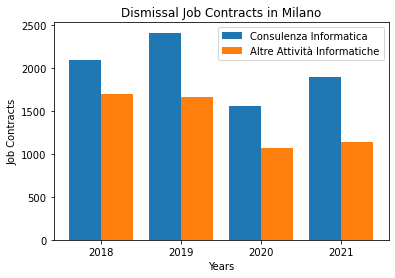

In [21]:
# Hist Plot to compare the Dismissal Job Contracts relating to IT Consultancy and Other IT Activities

Advice = Dismissals_Milano_Cons.CESSATO.to_numpy().ravel()
Other =  Dismissals_Milano_Altro.CESSATO.to_numpy().ravel()

X = [2018, 2019, 2020, 2021]
Y = Advice
Z = Other

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Y, 0.4, label = 'Consulenza Informatica')
plt.bar(X_axis + 0.2, Z, 0.4, label = 'Altre Attività Informatiche')
  
plt.xticks(X_axis, X)
plt.xlabel("Years")
plt.ylabel("Job Contracts")
plt.title("Dismissal Job Contracts in Milano")
plt.legend()
plt.show()

## Comparison between Hirings and Dismissals in Milano

In [22]:
Hirings_Milano_Combine = Hirings_Milano.copy()
Dismissals_Milano_Combine = Dismissals_Milano.copy()

In [23]:
Hirings_Milano_Combine = Hirings_Milano_Combine[['DATA', 'SETTOREECONOMICO', 'PROVINCIAIMPRESA', 'TIPO', 'ANNO']]
Dismissals_Milano_Combine = Dismissals_Milano_Combine[['DATA', 'SETTOREECONOMICO', 'PROVINCIAIMPRESA', 'TIPO', 'ANNO']]

In [24]:
Hirings_Milano_Combine = Hirings_Milano_Combine.groupby(["ANNO","SETTOREECONOMICO"]).count()
Hirings_Milano_Combine

DATA  \
ANNO SETTOREECONOMICO                                           
2018 Altre attività dei servizi connessi alle tecnol...  3415   
     Consulenza nel settore delle tecnologie dell'in...  3570   
2019 Altre attività dei servizi connessi alle tecnol...  3071   
     Consulenza nel settore delle tecnologie dell'in...  4127   
2020 Altre attività dei servizi connessi alle tecnol...  1825   
     Consulenza nel settore delle tecnologie dell'in...  2705   
2021 Altre attività dei servizi connessi alle tecnol...  1679   
     Consulenza nel settore delle tecnologie dell'in...  3506   

                                                         PROVINCIAIMPRESA  \
ANNO SETTOREECONOMICO                                                       
2018 Altre attività dei servizi connessi alle tecnol...              3415   
     Consulenza nel settore delle tecnologie dell'in...              3570   
2019 Altre attività dei servizi connessi alle tecnol...              3071   
     Consulenza nel settore delle tecnologie dell'in...              4127   
2020 Altre attività dei servizi connessi alle tecnol...              1825   
     Consulenza nel settore delle tecnologie dell'in...              2705   
2021 Altre attività dei servizi connessi alle tecnol...              1679   
     Consulenza nel settore delle tecnologie dell'in...              3506   

                                                         TIPO  
ANNO SETTOREECONOMICO                                          
2018 Altre attività dei servizi connessi alle tecnol...  3415  
     Consulenza nel settore delle tecnologie dell'in...  3570  
2019 Altre attività dei servizi connessi alle tecnol...  3071  
     Consulenza nel settore delle tecnologie dell'in...  4127  
2020 Altre attività dei servizi connessi alle tecnol...  1825  
     Consulenza nel settore delle tecnologie dell'in...  2705  
2021 Altre attività dei servizi connessi alle tecnol...  1679  
     Consulenza nel settore delle tecnologie dell'in...  3506

In [25]:
Dismissals_Milano_Combine = Dismissals_Milano_Combine.groupby(["ANNO","SETTOREECONOMICO"]).count()
Dismissals_Milano_Combine

DATA  \
ANNO SETTOREECONOMICO                                           
2018 Altre attività dei servizi connessi alle tecnol...  1701   
     Consulenza nel settore delle tecnologie dell'in...  2100   
2019 Altre attività dei servizi connessi alle tecnol...  1664   
     Consulenza nel settore delle tecnologie dell'in...  2415   
2020 Altre attività dei servizi connessi alle tecnol...  1069   
     Consulenza nel settore delle tecnologie dell'in...  1556   
2021 Altre attività dei servizi connessi alle tecnol...  1140   
     Consulenza nel settore delle tecnologie dell'in...  1901   

                                                         PROVINCIAIMPRESA  \
ANNO SETTOREECONOMICO                                                       
2018 Altre attività dei servizi connessi alle tecnol...              1701   
     Consulenza nel settore delle tecnologie dell'in...              2100   
2019 Altre attività dei servizi connessi alle tecnol...              1664   
     Consulenza nel settore delle tecnologie dell'in...              2415   
2020 Altre attività dei servizi connessi alle tecnol...              1069   
     Consulenza nel settore delle tecnologie dell'in...              1556   
2021 Altre attività dei servizi connessi alle tecnol...              1140   
     Consulenza nel settore delle tecnologie dell'in...              1901   

                                                         TIPO  
ANNO SETTOREECONOMICO                                          
2018 Altre attività dei servizi connessi alle tecnol...  1701  
     Consulenza nel settore delle tecnologie dell'in...  2100  
2019 Altre attività dei servizi connessi alle tecnol...  1664  
     Consulenza nel settore delle tecnologie dell'in...  2415  
2020 Altre attività dei servizi connessi alle tecnol...  1069  
     Consulenza nel settore delle tecnologie dell'in...  1556  
2021 Altre attività dei servizi connessi alle tecnol...  1140  
     Consulenza nel settore delle tecnologie dell'in...  1901

In [26]:
# Join implementation to obtain the Counter values of hired and fired people
Combination = Hirings_Milano_Combine.merge(Dismissals_Milano_Combine, on = ["ANNO", "SETTOREECONOMICO"], how = "inner")
Combination["ATTIVATO"]= Combination["TIPO_x"]
Combination = Combination.drop(["DATA_x","TIPO_x","PROVINCIAIMPRESA_x"], axis = 1)
Combination["CESSATO"]= Combination["TIPO_y"]
Combination = Combination.drop(["DATA_y","TIPO_y","PROVINCIAIMPRESA_y"], axis = 1)
Combination

ATTIVATO  CESSATO
ANNO SETTOREECONOMICO                                                     
2018 Altre attività dei servizi connessi alle tecnol...      3415     1701
     Consulenza nel settore delle tecnologie dell'in...      3570     2100
2019 Altre attività dei servizi connessi alle tecnol...      3071     1664
     Consulenza nel settore delle tecnologie dell'in...      4127     2415
2020 Altre attività dei servizi connessi alle tecnol...      1825     1069
     Consulenza nel settore delle tecnologie dell'in...      2705     1556
2021 Altre attività dei servizi connessi alle tecnol...      1679     1140
     Consulenza nel settore delle tecnologie dell'in...      3506     1901

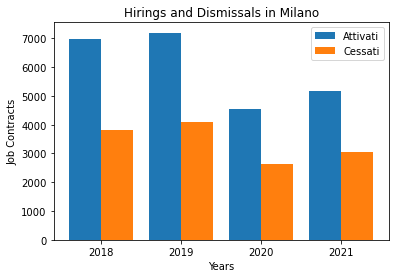

In [27]:
# Hist Plot to compare the Total Hiring and Dismissal job contracts 
#import matplotlib.pyplot as plt 

Sum = Combination.groupby(["ANNO"]).sum()
attivato = Sum.ATTIVATO.to_numpy().ravel()
cessato = Sum.CESSATO.to_numpy().ravel()

X = [2018, 2019, 2020, 2021]
Y = attivato
Z = cessato

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Y, 0.4, label = 'Attivati')
plt.bar(X_axis + 0.2, Z, 0.4, label = 'Cessati')
  
plt.xticks(X_axis, X)
plt.xlabel("Years")
plt.ylabel("Job Contracts")
plt.title("Hirings and Dismissals in Milano")
plt.legend()
plt.show()

# Bergamo: Analisys Hirings and Dismissals

Analysis of hires and layoffs between 2018 and 2021. Data are contained in two different DataSet to combine together with "merge" function.

In [28]:
Hirings_Bergamo = pd.read_csv('Hiring_Computer_Science_Cleaning.csv')
Dismissals_Bergamo = pd.read_csv('Dismissal_Computer_Science_Cleaning.csv')

In [29]:
# Change Type of DATA and SETTOREECONOMICO columns
Hirings_Bergamo = Hirings_Bergamo.loc[(Hirings_Bergamo['PROVINCIAIMPRESA'] == 'BERGAMO')]
Hirings_Bergamo['DATA'] = pd.to_datetime(Hirings_Bergamo['DATA'])

Dismissals_Bergamo = Dismissals_Bergamo.loc[(Dismissals_Bergamo['PROVINCIAIMPRESA'] == 'BERGAMO')]
Dismissals_Bergamo['DATA'] = pd.to_datetime(Dismissals_Bergamo['DATA'])

In [30]:
# Time Interval is selected for Hirings
interval_year = (Hirings_Bergamo['ANNO'] > 2017) & (Hirings_Bergamo['ANNO'] <= 2021)
Hirings_Bergamo = Hirings_Bergamo.loc[interval_year]

In [31]:
# Time Interval is selected for Dismissals
interval_year = (Dismissals_Bergamo['ANNO'] > 2017) & (Dismissals_Bergamo['ANNO'] <= 2021)
Dismissals_Bergamo = Dismissals_Bergamo.loc[interval_year]

## Comparison of Different Contract Type for 2021

In [32]:
# Groupby on Hiring Job Contracts in Milano > 100 
Contract_Bergamo_Activated = Hirings_Bergamo.loc[(Hirings_Bergamo['ANNO'] == 2021)]
Contract_Bergamo_Activated = Contract_Bergamo_Activated.groupby('CONTRATTO').CONTRATTO.count()
Contract_Bergamo_Activated

CONTRATTO
APPRENDISTATO PER LA QUALIFICA E PER IL DIPLOMA PROFESSIONALE, IL DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE E IL CERTIFICATO DI SPECIALIZZAZIONE TECNICA SUPERIORE     4
APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO DI MESTIERE                                                                                                              30
COLLABORAZIONE COORDINATA E CONTINUATIVA                                                                                                                                5
LAVORO A TEMPO DETERMINATO                                                                                                                                             44
LAVORO A TEMPO INDETERMINATO                                                                                                                                           48
TIROCINIO                                                                                                                                   

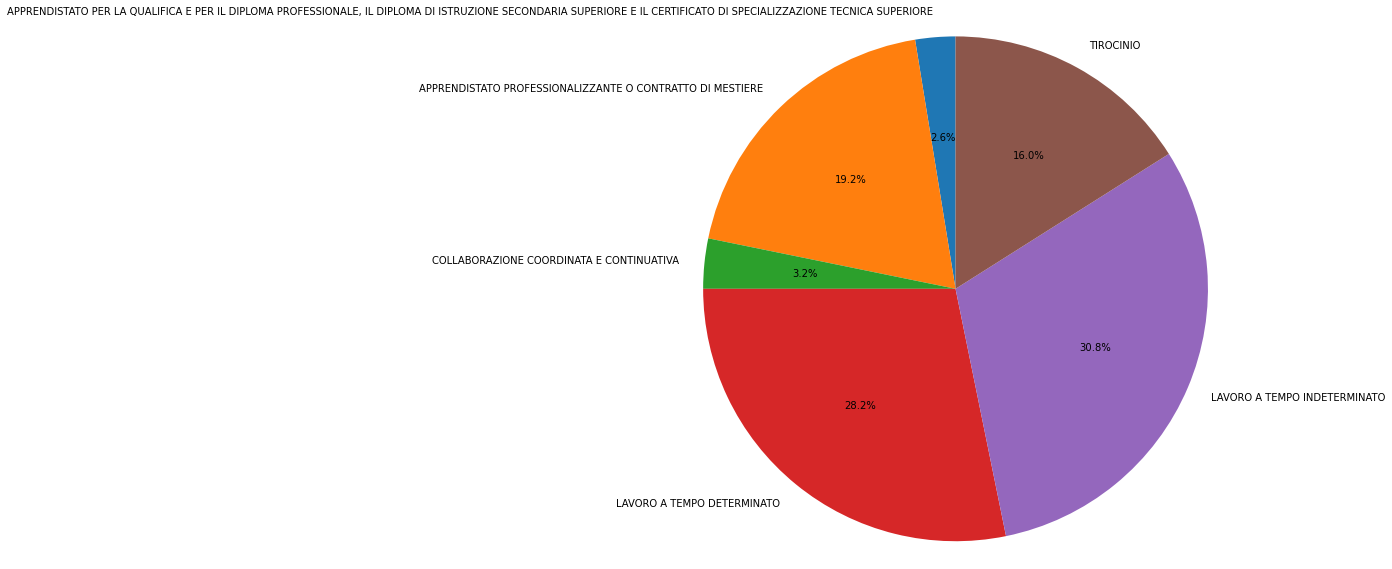

In [33]:
# Piechart creation to understand the variation of job contracts in IT Consulting Sector
xaxis = Contract_Bergamo_Activated.index
value = Contract_Bergamo_Activated.values
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(value, labels=xaxis, autopct='%1.1f%%',  #'autopct' represent the field centre of labels
        shadow=False, startangle=90)
ax1.axis('equal')                                # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [34]:
# Groupby on Dismissal Job Contracts in Bergamo > 100 
Contract_Bergamo_Ceased = Dismissals_Bergamo.loc[(Dismissals_Bergamo['ANNO'] == 2021)]
Contract_Bergamo_Ceased = Contract_Bergamo_Ceased.groupby('CONTRATTO').CONTRATTO.count()
Contract_Bergamo_Ceased

CONTRATTO
APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO DI MESTIERE     7
COLLABORAZIONE COORDINATA E CONTINUATIVA                      1
LAVORO A TEMPO DETERMINATO                                    3
LAVORO A TEMPO INDETERMINATO                                 49
TIROCINIO                                                     5
Name: CONTRATTO, dtype: int64

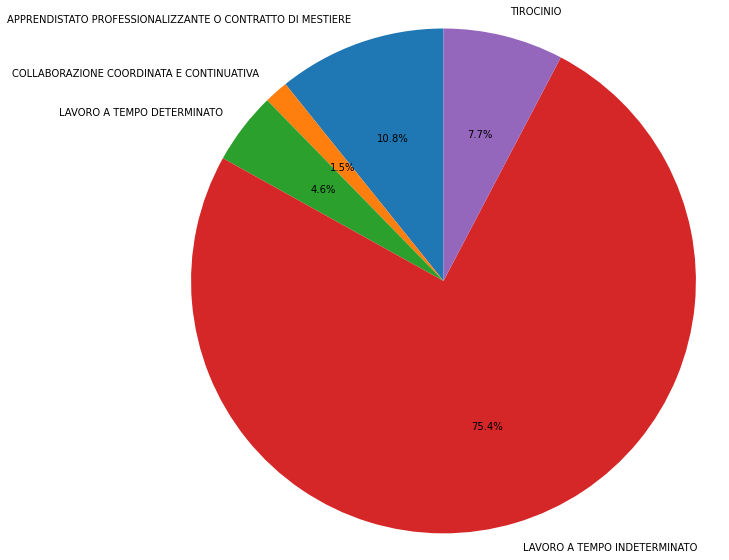

In [35]:
# Piechart creation to understand the variation of job contracts in IT Consulting Sector
xaxis = Contract_Bergamo_Ceased.index
value = Contract_Bergamo_Ceased.values
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(value, labels=xaxis, autopct='%1.1f%%',  #'autopct' represent the field centre of labels
        shadow=False, startangle=90)
ax1.axis('equal')                                # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Comparison of Hirings from Two Similar Sectors

In [36]:
Hirings_Bergamo.head()

,DATA,GENERE,ETA,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO,TIPO,ANNO,SETTOREECONOMICO
0,2018-01-05,F,40,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO A TEMPO DETERMINATO,TEMPO PARZIALE ORIZZONTALE,BERGAMO,ITALIA,ATTIVATO,2018,Consulenza nel settore delle tecnologie dell'i...
20,2018-04-10,M,22,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA,ATTIVATO,2018,Consulenza nel settore delle tecnologie dell'i...
124,2020-11-06,M,25,LAUREA - Vecchio o nuovo ordinamento,TIROCINIO,NON DEFINITO,BERGAMO,ITALIA,ATTIVATO,2020,Altre attività dei servizi connessi alle tecno...
125,2021-05-07,M,20,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PARZIALE ORIZZONTALE,BERGAMO,ITALIA,ATTIVATO,2021,Consulenza nel settore delle tecnologie dell'i...
132,2018-07-05,M,33,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO A TEMPO INDETERMINATO,TEMPO PIENO,BERGAMO,ITALIA,ATTIVATO,2018,Altre attività dei servizi connessi alle tecno...


In [37]:
Hirings_Bergamo_Cons = Hirings_Bergamo.copy()
Hirings_Bergamo_Cons = Hirings_Bergamo_Cons.loc[(Hirings_Bergamo_Cons['SETTOREECONOMICO'] == "Consulenza nel settore delle tecnologie dell'informatica")]
Hirings_Bergamo_Altro = Hirings_Bergamo.copy()
Hirings_Bergamo_Altro = Hirings_Bergamo_Altro.loc[(Hirings_Bergamo_Altro['SETTOREECONOMICO'] == "Altre attività dei servizi connessi alle tecnologie dell'informatica nca")]

In [38]:
# Reconstruction of the DataSets
Hirings_Bergamo_Cons = Hirings_Bergamo_Cons[['DATA', 'SETTOREECONOMICO', 'PROVINCIAIMPRESA', 'TIPO', 'ANNO']]
Hirings_Bergamo_Altro = Hirings_Bergamo_Altro[['DATA', 'SETTOREECONOMICO', 'PROVINCIAIMPRESA', 'TIPO', 'ANNO']]

In [39]:
Hirings_Bergamo_Cons = Hirings_Bergamo_Cons.groupby(["ANNO","SETTOREECONOMICO"]).count()
Hirings_Bergamo_Cons["ATTIVATO"]= Hirings_Bergamo_Cons["TIPO"]
Hirings_Bergamo_Cons = Hirings_Bergamo_Cons.drop(["DATA","PROVINCIAIMPRESA","TIPO"], axis = 1)
Hirings_Bergamo_Cons

,,ATTIVATO
ANNO,SETTOREECONOMICO,
2018,Consulenza nel settore delle tecnologie dell'informatica,54
2019,Consulenza nel settore delle tecnologie dell'informatica,71
2020,Consulenza nel settore delle tecnologie dell'informatica,50
2021,Consulenza nel settore delle tecnologie dell'informatica,73


In [40]:
Hirings_Bergamo_Altro = Hirings_Bergamo_Altro.groupby(["ANNO","SETTOREECONOMICO"]).count()
Hirings_Bergamo_Altro["ATTIVATO"]= Hirings_Bergamo_Altro["TIPO"]
Hirings_Bergamo_Altro = Hirings_Bergamo_Altro.drop(["DATA","PROVINCIAIMPRESA","TIPO"], axis = 1)
Hirings_Bergamo_Altro

,,ATTIVATO
ANNO,SETTOREECONOMICO,
2018,Altre attività dei servizi connessi alle tecnologie dell'informatica nca,115
2019,Altre attività dei servizi connessi alle tecnologie dell'informatica nca,203
2020,Altre attività dei servizi connessi alle tecnologie dell'informatica nca,121
2021,Altre attività dei servizi connessi alle tecnologie dell'informatica nca,83


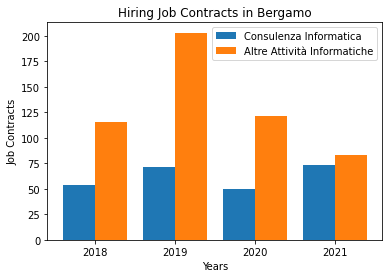

In [41]:
# Hist Plot to compare the Hiring Job Contracts relating to IT Consultancy and Other IT Activities

Advice = Hirings_Bergamo_Cons.ATTIVATO.to_numpy().ravel()
Other =  Hirings_Bergamo_Altro.ATTIVATO.to_numpy().ravel()

X = [2018, 2019, 2020, 2021]
Y = Advice
Z = Other

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Y, 0.4, label = 'Consulenza Informatica')
plt.bar(X_axis + 0.2, Z, 0.4, label = 'Altre Attività Informatiche')
  
plt.xticks(X_axis, X)
plt.xlabel("Years")
plt.ylabel("Job Contracts")
plt.title("Hiring Job Contracts in Bergamo")
plt.legend()
plt.show()

## Comparison of Dismissals from Two Similar Sectors

In [42]:
Dismissals_Bergamo.head()

,DATA,GENERE,ETA,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO,TIPO,ANNO,SETTOREECONOMICO
0,2018-05-02,M,47,LAUREA - Vecchio o nuovo ordinamento,LAVORO A TEMPO INDETERMINATO,TEMPO PIENO,BERGAMO,ITALIA,CESSATO,2018,Altre attività dei servizi connessi alle tecno...
11,2021-10-04,M,30,TITOLO DI ISTRUZIONE SECONDARIA SUPERIORE (SCO...,LAVORO A TEMPO INDETERMINATO,TEMPO PIENO,BERGAMO,ITALIA,CESSATO,2021,Consulenza nel settore delle tecnologie dell'i...
91,2021-04-01,F,32,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,COLLABORAZIONE COORDINATA E CONTINUATIVA,NON DEFINITO,BERGAMO,ITALIA,CESSATO,2021,Altre attività dei servizi connessi alle tecno...
94,2019-09-06,F,28,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO A TEMPO INDETERMINATO,TEMPO PIENO,BERGAMO,ITALIA,CESSATO,2019,Consulenza nel settore delle tecnologie dell'i...
95,2021-05-03,F,35,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO A TEMPO INDETERMINATO,TEMPO PIENO,BERGAMO,ITALIA,CESSATO,2021,Altre attività dei servizi connessi alle tecno...


In [43]:
Dismissals_Bergamo_Cons = Dismissals_Bergamo.copy()
Dismissals_Bergamo_Cons = Dismissals_Bergamo_Cons.loc[(Dismissals_Bergamo_Cons['SETTOREECONOMICO'] == "Consulenza nel settore delle tecnologie dell'informatica")]
Dismissals_Bergamo_Altro = Dismissals_Bergamo.copy()
Dismissals_Bergamo_Altro = Dismissals_Bergamo_Altro.loc[(Dismissals_Bergamo_Altro['SETTOREECONOMICO'] == "Altre attività dei servizi connessi alle tecnologie dell'informatica nca")]

In [44]:
# Reconstruction of the DataSets
Dismissals_Bergamo_Cons = Dismissals_Bergamo_Cons[['DATA', 'SETTOREECONOMICO', 'PROVINCIAIMPRESA', 'TIPO', 'ANNO']]
Dismissals_Bergamo_Altro = Dismissals_Bergamo_Altro[['DATA', 'SETTOREECONOMICO', 'PROVINCIAIMPRESA', 'TIPO', 'ANNO']]

In [45]:
Dismissals_Bergamo_Cons = Dismissals_Bergamo_Cons.groupby(["ANNO","SETTOREECONOMICO"]).count()
Dismissals_Bergamo_Cons["CESSATO"]= Dismissals_Bergamo_Cons["TIPO"]
Dismissals_Bergamo_Cons = Dismissals_Bergamo_Cons.drop(["DATA","PROVINCIAIMPRESA","TIPO"], axis = 1)
Dismissals_Bergamo_Cons

,,CESSATO
ANNO,SETTOREECONOMICO,
2018,Consulenza nel settore delle tecnologie dell'informatica,19
2019,Consulenza nel settore delle tecnologie dell'informatica,29
2020,Consulenza nel settore delle tecnologie dell'informatica,22
2021,Consulenza nel settore delle tecnologie dell'informatica,22


In [46]:
Dismissals_Bergamo_Altro = Dismissals_Bergamo_Altro.groupby(["ANNO","SETTOREECONOMICO"]).count()
Dismissals_Bergamo_Altro["CESSATO"]= Dismissals_Bergamo_Altro["TIPO"]
Dismissals_Bergamo_Altro = Dismissals_Bergamo_Altro.drop(["DATA","PROVINCIAIMPRESA","TIPO"], axis = 1)
Dismissals_Bergamo_Altro

,,CESSATO
ANNO,SETTOREECONOMICO,
2018,Altre attività dei servizi connessi alle tecnologie dell'informatica nca,96
2019,Altre attività dei servizi connessi alle tecnologie dell'informatica nca,96
2020,Altre attività dei servizi connessi alle tecnologie dell'informatica nca,43
2021,Altre attività dei servizi connessi alle tecnologie dell'informatica nca,43


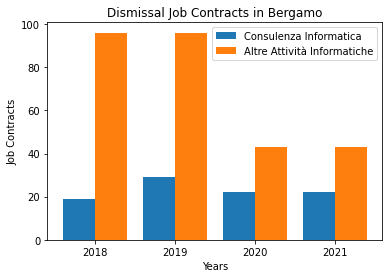

In [47]:
# Hist Plot to compare the Dismissal Job Contracts relating to IT Consultancy and Other IT Activities

Advice = Dismissals_Bergamo_Cons.CESSATO.to_numpy().ravel()
Other =  Dismissals_Bergamo_Altro.CESSATO.to_numpy().ravel()

X = [2018, 2019, 2020, 2021]
Y = Advice
Z = Other

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Y, 0.4, label = 'Consulenza Informatica')
plt.bar(X_axis + 0.2, Z, 0.4, label = 'Altre Attività Informatiche')
  
plt.xticks(X_axis, X)
plt.xlabel("Years")
plt.ylabel("Job Contracts")
plt.title("Dismissal Job Contracts in Bergamo")
plt.legend()
plt.show()

## Comparison between Hirings and Dismissals in Bergamo

In [48]:
Hirings_Bergamo_Combine = Hirings_Bergamo.copy()
Dismissals_Bergamo_Combine = Dismissals_Bergamo.copy()

In [49]:
Hirings_Bergamo_Combine = Hirings_Bergamo_Combine[['DATA', 'SETTOREECONOMICO', 'PROVINCIAIMPRESA', 'TIPO', 'ANNO']]
Dismissals_Bergamo_Combine = Dismissals_Bergamo_Combine[['DATA', 'SETTOREECONOMICO', 'PROVINCIAIMPRESA', 'TIPO', 'ANNO']]

In [50]:
Hirings_Bergamo_Combine = Hirings_Bergamo_Combine.groupby(["ANNO","SETTOREECONOMICO"]).count()
Hirings_Bergamo_Combine

DATA  \
ANNO SETTOREECONOMICO                                           
2018 Altre attività dei servizi connessi alle tecnol...   115   
     Consulenza nel settore delle tecnologie dell'in...    54   
2019 Altre attività dei servizi connessi alle tecnol...   203   
     Consulenza nel settore delle tecnologie dell'in...    71   
2020 Altre attività dei servizi connessi alle tecnol...   121   
     Consulenza nel settore delle tecnologie dell'in...    50   
2021 Altre attività dei servizi connessi alle tecnol...    83   
     Consulenza nel settore delle tecnologie dell'in...    73   

                                                         PROVINCIAIMPRESA  \
ANNO SETTOREECONOMICO                                                       
2018 Altre attività dei servizi connessi alle tecnol...               115   
     Consulenza nel settore delle tecnologie dell'in...                54   
2019 Altre attività dei servizi connessi alle tecnol...               203   
     Consulenza nel settore delle tecnologie dell'in...                71   
2020 Altre attività dei servizi connessi alle tecnol...               121   
     Consulenza nel settore delle tecnologie dell'in...                50   
2021 Altre attività dei servizi connessi alle tecnol...                83   
     Consulenza nel settore delle tecnologie dell'in...                73   

                                                         TIPO  
ANNO SETTOREECONOMICO                                          
2018 Altre attività dei servizi connessi alle tecnol...   115  
     Consulenza nel settore delle tecnologie dell'in...    54  
2019 Altre attività dei servizi connessi alle tecnol...   203  
     Consulenza nel settore delle tecnologie dell'in...    71  
2020 Altre attività dei servizi connessi alle tecnol...   121  
     Consulenza nel settore delle tecnologie dell'in...    50  
2021 Altre attività dei servizi connessi alle tecnol...    83  
     Consulenza nel settore delle tecnologie dell'in...    73

In [51]:
Dismissals_Bergamo_Combine = Dismissals_Bergamo_Combine.groupby(["ANNO","SETTOREECONOMICO"]).count()
Dismissals_Bergamo_Combine

DATA  \
ANNO SETTOREECONOMICO                                           
2018 Altre attività dei servizi connessi alle tecnol...    96   
     Consulenza nel settore delle tecnologie dell'in...    19   
2019 Altre attività dei servizi connessi alle tecnol...    96   
     Consulenza nel settore delle tecnologie dell'in...    29   
2020 Altre attività dei servizi connessi alle tecnol...    43   
     Consulenza nel settore delle tecnologie dell'in...    22   
2021 Altre attività dei servizi connessi alle tecnol...    43   
     Consulenza nel settore delle tecnologie dell'in...    22   

                                                         PROVINCIAIMPRESA  \
ANNO SETTOREECONOMICO                                                       
2018 Altre attività dei servizi connessi alle tecnol...                96   
     Consulenza nel settore delle tecnologie dell'in...                19   
2019 Altre attività dei servizi connessi alle tecnol...                96   
     Consulenza nel settore delle tecnologie dell'in...                29   
2020 Altre attività dei servizi connessi alle tecnol...                43   
     Consulenza nel settore delle tecnologie dell'in...                22   
2021 Altre attività dei servizi connessi alle tecnol...                43   
     Consulenza nel settore delle tecnologie dell'in...                22   

                                                         TIPO  
ANNO SETTOREECONOMICO                                          
2018 Altre attività dei servizi connessi alle tecnol...    96  
     Consulenza nel settore delle tecnologie dell'in...    19  
2019 Altre attività dei servizi connessi alle tecnol...    96  
     Consulenza nel settore delle tecnologie dell'in...    29  
2020 Altre attività dei servizi connessi alle tecnol...    43  
     Consulenza nel settore delle tecnologie dell'in...    22  
2021 Altre attività dei servizi connessi alle tecnol...    43  
     Consulenza nel settore delle tecnologie dell'in...    22

In [52]:
# Join implementation to obtain the Counter values of hired and fired people
Combination = Hirings_Bergamo_Combine.merge(Dismissals_Bergamo_Combine, on = ["ANNO", "SETTOREECONOMICO"], how = "inner")
Combination["ATTIVATO"]= Combination["TIPO_x"]
Combination = Combination.drop(["DATA_x","TIPO_x","PROVINCIAIMPRESA_x"], axis = 1)
Combination["CESSATO"]= Combination["TIPO_y"]
Combination = Combination.drop(["DATA_y","TIPO_y","PROVINCIAIMPRESA_y"], axis = 1)
Combination

ATTIVATO  CESSATO
ANNO SETTOREECONOMICO                                                     
2018 Altre attività dei servizi connessi alle tecnol...       115       96
     Consulenza nel settore delle tecnologie dell'in...        54       19
2019 Altre attività dei servizi connessi alle tecnol...       203       96
     Consulenza nel settore delle tecnologie dell'in...        71       29
2020 Altre attività dei servizi connessi alle tecnol...       121       43
     Consulenza nel settore delle tecnologie dell'in...        50       22
2021 Altre attività dei servizi connessi alle tecnol...        83       43
     Consulenza nel settore delle tecnologie dell'in...        73       22

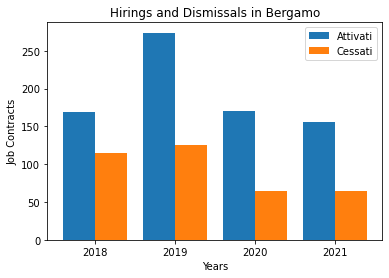

In [53]:
# Hist Plot to compare the Total Hiring and Dismissal job contracts 
#import matplotlib.pyplot as plt 

Sum = Combination.groupby(["ANNO"]).sum()
attivato = Sum.ATTIVATO.to_numpy().ravel()
cessato = Sum.CESSATO.to_numpy().ravel()

X = [2018, 2019, 2020, 2021]
Y = attivato
Z = cessato

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Y, 0.4, label = 'Attivati')
plt.bar(X_axis + 0.2, Z, 0.4, label = 'Cessati')
  
plt.xticks(X_axis, X)
plt.xlabel("Years")
plt.ylabel("Job Contracts")
plt.title("Hirings and Dismissals in Bergamo")
plt.legend()
plt.show()